In [ ]:
# I will upload updated version soon with Random Forest and Bossting technniques

In [4]:
import pandas as pd
import numpy as np

In [9]:
Network_train= pd.read_csv('C:/Users/tejan/Desktop/Data Analystics/class work/Case Study/3. Network Intrusion Detection System/NSL_Dataset/train.txt', sep = ',', header = None)
Network_train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [13]:
Network_test= pd.read_csv('C:/Users/tejan/Desktop/Data Analystics/class work/Case Study/3. Network Intrusion Detection System/NSL_Dataset/test.txt', sep = ',', header = None)
Network_test.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [14]:
Network_test.columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent",
 "hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root",
 "num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login",
 "count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", 
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate",
 "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
 "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [10]:
Network_train.columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent",
 "hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root",
 "num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login",
 "count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", 
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate",
 "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
 "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [11]:
Network_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [38]:
Network_Final.service.unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [21]:
Network_Final = Network_train.append(Network_test)

In [48]:
Network_Final.shape

(148517, 43)

In [37]:
Network_Final.flag.value_counts()

SF        89820
S0        36864
REJ       15083
RSTR       3090
RSTO       2335
S1          386
SH          344
S3          298
S2          142
RSTOS0      105
OTH          50
Name: flag, dtype: int64

In [30]:
Network_Final['attack'] = np.where( Network_Final['attack'] == 'normal', 0, 1 )

In [49]:
#seperating cat and num feature 

Cat_feature = Network_Final.loc[ :, Network_Final.dtypes == 'object']

In [50]:
Num_feature = Network_Final.loc[ :, (Network_Final.dtypes == 'int32') | (Network_Final.dtypes == 'int64') | (Network_Final.dtypes == 'float64')]

In [67]:
# checking outliers in data 
Num_feature.describe(percentiles=[.01,.05,.25,.5,.75,.9,.95,.99]).T


,count,mean,std,min,1%,5%,25%,50%,75%,90%,95%,99%,max
duration,148517.0,147.016449,995.155352,0.0,0.0,0.00,0.00,0.00,0.00,0.00,9.00,8172.0000,8172.00
src_bytes,148517.0,1310.206475,7248.518266,0.0,0.0,0.00,0.00,44.00,278.00,884.00,1594.20,54540.0000,54540.00
dst_bytes,148517.0,1355.040391,3814.989900,0.0,0.0,0.00,0.00,0.00,571.00,3437.40,8314.00,25594.9344,25598.16
land,148517.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00
wrong_fragment,148517.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00
urgent,148517.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00
hot,148517.0,0.046439,0.296027,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2.0000,2.00
num_failed_logins,148517.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00
logged_in,148517.0,0.402789,0.490461,0.0,0.0,0.00,0.00,0.00,1.00,1.00,1.00,1.0000,1.00
num_compromised,148517.0,0.011144,0.104973,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.0000,1.00


In [66]:
# cutting at 99%

Num_feature = Num_feature.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.quantile(0.99)))

In [71]:
Cat_feature = pd.get_dummies(Cat_feature, drop_first=True)

In [74]:
Network_Final = pd.concat([Num_feature, Cat_feature], axis = 1)

In [78]:
Network_Final.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [94]:
network_new.drop(['wrong_fragment','urgent','root_shell','num_root','num_shells','is_host_login','su_attempted','is_guest_login', 'land'] , axis = 1, inplace = True )

0    148517
Name: land, dtype: int64

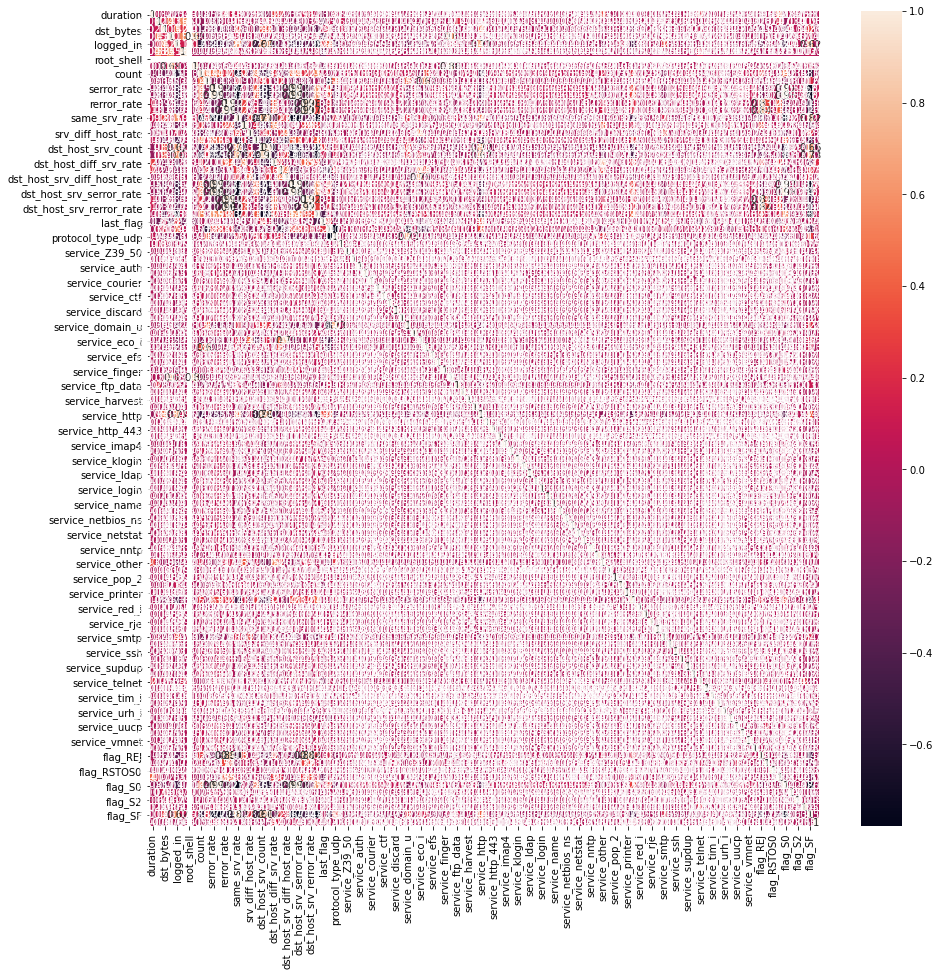

In [97]:
from matplotlib import pyplot as plt
import seaborn as sns
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (15, 15))
sns.heatmap(Network_Final.corr(), annot=True)

In [99]:
Network_Final.corr()

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,is_guest_login,count,srv_count,serror_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
duration,1.000000,0.031754,0.022298,0.014879,-0.070226,0.048040,0.008038,-0.102243,-0.051021,-0.083555,...,-0.049663,-0.009222,0.016897,0.413059,-0.084887,-0.007541,0.006298,0.023342,-0.014423,-0.007118
src_bytes,0.031754,1.000000,0.113106,0.428118,0.156236,0.559997,-0.009997,-0.107363,-0.032763,-0.100523,...,-0.060772,-0.021083,0.004723,0.173601,-0.103860,0.034170,0.010169,0.009027,0.079689,-0.008709
dst_bytes,0.022298,0.113106,1.000000,0.145471,0.417963,0.239904,0.012610,-0.231851,-0.086668,-0.189932,...,-0.119418,-0.040052,-0.009448,-0.024563,-0.204092,0.128407,0.039919,-0.008491,0.258516,-0.017114
hot,0.014879,0.428118,0.145471,1.000000,0.183832,0.548446,0.691516,-0.108660,-0.052815,-0.085645,...,-0.052743,-0.007028,-0.004173,0.011554,-0.089772,0.006734,0.067270,-0.003984,0.106346,-0.006612
logged_in,-0.070226,0.156236,0.417963,0.183832,1.000000,0.129262,0.123230,-0.530780,-0.199070,-0.466492,...,-0.276112,-0.073997,-0.021844,-0.052190,-0.471858,0.046788,0.028786,-0.021485,0.622415,-0.039570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
flag_S1,-0.007541,0.034170,0.128407,0.006734,0.046788,0.017258,0.007495,-0.035271,-0.016560,0.058823,...,-0.017163,-0.006452,-0.001358,-0.007441,-0.029332,1.000000,-0.001579,-0.002289,-0.063146,-0.002460
flag_S2,0.006298,0.010169,0.039919,0.067270,0.028786,-0.001209,-0.001478,-0.020431,-0.010091,0.039680,...,-0.010401,-0.003910,-0.000823,-0.004509,-0.017776,-0.001579,1.000000,-0.001387,-0.038269,-0.001491
flag_S3,0.023342,0.009027,-0.008491,-0.003984,-0.021485,-0.003327,-0.005005,-0.031202,-0.015566,0.067788,...,-0.015075,-0.005667,-0.001193,-0.006536,-0.025765,-0.002289,-0.001387,1.000000,-0.055467,-0.002160
flag_SF,-0.014423,0.079689,0.258516,0.106346,0.622415,0.075320,0.087869,-0.500416,0.199866,-0.723157,...,-0.415900,-0.156342,-0.032903,-0.180316,-0.710795,-0.063146,-0.038269,-0.055467,1.000000,-0.059604


In [125]:
Network_Final.corr().to_csv('C:/Users/tejan/Desktop/corr.csv')

In [95]:
Network_Final.drop(['wrong_fragment','urgent','land','num_root','num_failed_logins', 'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login'] , axis = 1, inplace = True )

In [98]:
Network_Final.drop(['root_shell'] , axis = 1, inplace = True )

In [101]:
Network_Final.head()

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,is_guest_login,count,srv_count,serror_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0.0,0,0,0,0,2,2,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0.0,0,0,0,0,13,1,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0.0,0,0,0,0,123,6,1.0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153.0,0,1,0,0,5,5,0.2,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420.0,0,1,0,0,30,32,0.0,...,0,0,0,0,0,0,0,0,1,0


In [127]:
# fininding VIf 

# get all the dependent avriables
features = ' + '.join(Network_Final.columns.difference(['attack']))
# features

In [110]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
a, b = dmatrices('attack ~ ' + features, data = Network_Final, return_type = 'dataframe')

In [129]:
# get the VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

vif

,VIF Factor,features
0,103.986101,Intercept
1,3.214190,count
2,1.581109,diff_srv_rate
3,1.304836,dst_bytes
4,1.802573,dst_host_count
...,...,...
72,1.025038,service_vmnet
73,1.025778,service_whois
74,1.722681,src_bytes
75,2.580724,srv_count


In [114]:
# sommer's D value

somersd_df = pd.DataFrame()

In [119]:
import scipy.stats as stats
import statsmodels.formula.api as sm

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


In [120]:
for num_variable in Network_Final.columns.difference(['attack']):
    
    # execute teh logit model
    logreg = sm.logit(formula = str('attack ~ ') + str(num_variable), data = Network_Final).fit()
    
    # get the predicted probabilities and create a dataframe with the predicted values
    y_score = pd.DataFrame(logreg.predict())
    
    # name the column of the df as score
    y_score.columns = ['Score']
    
    # calculate the Somer's D values
    somers_d = 2 * metrics.roc_auc_score(Network_Final['attack'], y_score) - 1
    
    # place the variable name and the Somers' D score in a temp dataframe
    temp = pd.DataFrame([num_variable, somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    
    # append the data in the dataframe for all the X variables
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.516230
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.664631
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.602697
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.618243
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.656695
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.643208
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689113
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.446227
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.479450
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.418808
  

C:\Users\tejan\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.692429
         Iterations: 35


C:\Users\tejan\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Optimization terminated successfully.
         Current function value: 0.691393
         Iterations 5
         Current function value: 0.688701
         Iterations: 35


C:\Users\tejan\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.688611
         Iterations: 35


C:\Users\tejan\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.689578
         Iterations: 35


C:\Users\tejan\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.689454
         Iterations: 35


C:\Users\tejan\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\tejan\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: inf
         Iterations: 35


C:\Users\tejan\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [122]:
# print the Somer's D values for all variables
# Bi-variate analysis to check the predictive power of each independent against dependent
somersd_df.sort_values(by = 'SomersD', ascending = False).to_csv('C:/Users/tejan/Desktop/somersd.csv')

In [123]:
# dropping some variables based on VIF, sommers'd and correlation matrix

Network_Final.drop(['protocol_type_tcp',
'protocol_type_udp',
'service_eco_i',
'service_ecr_i',
'service_red_i',
'service_tim_i',
'service_urh_i',
'service_urp_i',
'flag_SF',
'flag_S0',
'flag_REJ',
'service_http',
'srv_serror_rate',
'service_private',
'serror_rate',
'srv_rerror_rate',
'flag_RSTR',
'rerror_rate',
'dst_host_srv_serror_rate',
'flag_RSTO',
'service_domain_u',
'service_smtp',
'dst_host_serror_rate',
'service_ftp_data',
'service_other',
'service_telnet',
'dst_host_srv_rerror_rate',
'service_ftp',
'dst_host_same_srv_rate',
'same_srv_rate',
'service_finger',
'logged_in'

    
] , axis = 1, inplace = True )

In [124]:
Network_Final.shape

(148517, 77)

In [ ]:
dst_host_srv_count
dst_host_count
hot
num_compromised


In [131]:
# dropping some variables based on VIF, sommers'd and correlation matrix

Network_Final.drop([
'dst_host_srv_count',
'dst_host_count',
'hot',
'num_compromised'
] , axis = 1, inplace = True )

In [135]:
#Splitting the data

feature_columns = Network_Final.columns.difference( ['attack'] )
#feature_columns1 = feature_columns

In [136]:
train_X, test_X, train_y, test_y = train_test_split(Network_Final[feature_columns],
                                                   Network_Final['attack'],
                                                   test_size = 0.3,
                                                   random_state = 123)

In [137]:
logreg = LogisticRegression()
logreg.fit( train_X, train_y)

C:\Users\tejan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
predict_proba_df = logreg.predict_proba(test_X)

In [152]:
#Predicting the test cases
Network_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )
Network_test_pred.head()

,actual,predicted
87015,0,0
101991,1,1
22048,1,1
1371,0,0
34176,1,1


In [153]:
Network_test_pred = Network_test_pred.reset_index()

In [141]:
metrics.accuracy_score(test_y, logreg.predict( test_X ))

0.9009336565221294

In [145]:
auc_score = metrics.roc_auc_score( Network_test_pred.actual, logreg.predict( test_X )  )
round( float( auc_score ), 3)

0.899

In [156]:
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )

In [158]:
Network_test_pred1 = pd.concat([Network_test_pred, predict_proba_df], axis = 1 )
Network_test_pred1.columns = [ 'index','actual', 'predicted', 'Left_0', 'Left_1']



In [159]:
Network_test_pred1

,index,actual,predicted,Left_0,Left_1
0,87015,0,0,9.633788e-01,0.036621
1,101991,1,1,7.671514e-07,0.999999
2,22048,1,1,7.670800e-03,0.992329
3,1371,0,0,8.956925e-01,0.104308
4,34176,1,1,5.301125e-03,0.994699
...,...,...,...,...,...
44551,18586,0,0,8.242948e-01,0.175705
44552,122040,0,0,9.495758e-01,0.050424
44553,20059,0,0,9.356183e-01,0.064382
44554,56775,1,1,2.018032e-06,0.999998


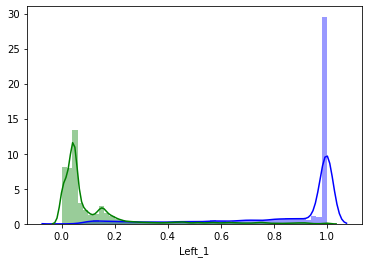

In [161]:
# very important step to get the estimate of cutoff...like intersection one will be around 
sns.distplot( Network_test_pred1[Network_test_pred1.actual == 1]["Left_1"], color = 'b' )
sns.distplot( Network_test_pred1[Network_test_pred1.actual == 0]["Left_1"], color = 'g' )

In [163]:
train_pf = Network_test_pred1[['actual', 'Left_1']]

In [165]:
train_pf.Left_1.max()

1.0

In [166]:
roc_like_df = pd.DataFrame()
train_temp = train_pf.copy()

for cut_off in np.linspace(0,1,100):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['Left_1'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    
    
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df



,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.478409,1.000000
0,0.010101,0.999953,0.104346,0.532813,1.104299
0,0.020202,0.999953,0.163855,0.563852,1.163809
0,0.030303,0.999953,0.225559,0.596036,1.225512
0,0.040404,0.999859,0.328012,0.649430,1.327871
...,...,...,...,...,...
0,0.959596,0.613530,0.996386,0.813224,1.609915
0,0.969697,0.603725,0.996687,0.808690,1.600412
0,0.979798,0.590871,0.996859,0.802630,1.587730
0,0.989899,0.560799,0.997332,0.788491,1.558132


In [167]:
# cut-off based on highest sum(sensitivity + specicity) - common way of identifying cut-off
roc_like_df[roc_like_df['total'] == roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.282828,0.927332,0.890835,0.908295,1.818166


In [168]:
#Predicting with new cut-off probability
Network_test_pred1['new_labels'] = Network_test_pred1['Left_1'].map( lambda x: 1 if x >= 0.28 else 0 )

In [169]:
cm_final = metrics.confusion_matrix( Network_test_pred1.actual,
                            Network_test_pred1.new_labels ,[1,0])
cm_final

C:\Users\tejan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([[19775,  1541],
       [ 2552, 20688]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

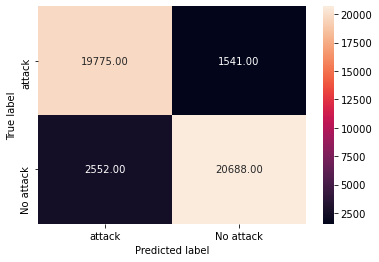

In [170]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["attack", "No attack"] , yticklabels = ["attack", "No attack"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [147]:
cm = metrics.confusion_matrix( Network_test_pred.actual,
                            Network_test_pred.predicted,[1,0])
cm

C:\Users\tejan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([[18455,  2861],
       [ 1553, 21687]], dtype=int64)